In [1]:
import optforge as of

import torch
from torchzero.optim.zeroth_order import SPSA

from optforge.benchmark.vobench_benchmarks import VOBenchmark
import vobench as vb
from optforge.integrations.torch import TorchOptimizer
import numpy as np
import functools

inputs = vb.imread(r"F:\Stuff\Programming\AI\VOBench\notebooks\affine\A2.jpeg")[:,:,0]
targets = vb.imread(r"F:\Stuff\Programming\AI\VOBench\notebooks\affine\A.jpeg")[:,:,0]

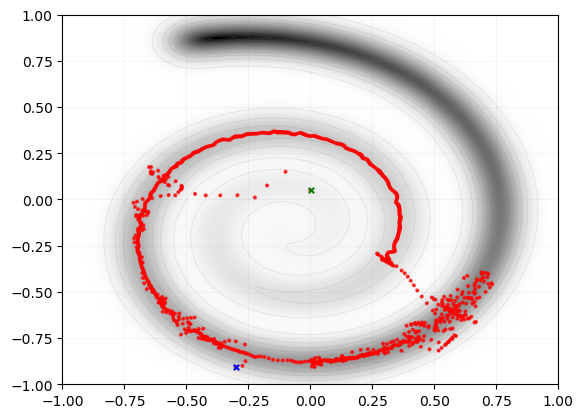

In [11]:
vob = vb.ImageDescent(vb.surfaces.OUTWARD_GAUSS, (500,500),)

params = [torch.tensor([0.,0.05], requires_grad=True)]
optimizer = SPSA(params, 1e-2, 1e-3, variant='SPSA', set_grad=True, opt = torch.optim.AdamW(params, 0.1))

for i in range(1000):
    def closure():
        optimizer.zero_grad()
        return vob.step_noline(params[0])
    optimizer.step(closure)
vob.plot()

evals: 1001/1001 | best value: 0.4258                            
Job finished in 1.0s., did 1001 evaluations.


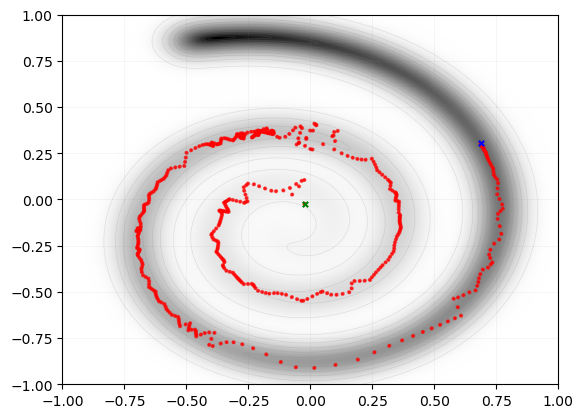

In [11]:
vob = vb.ImageDescent(vb.surfaces.OUTWARD_GAUSS, (500,500),)

optimizer = TorchOptimizer(
    lambda params: SPSA(params, 1e-2, 1e-3, variant='SPSA', set_grad=True, opt = torch.optim.AdamW(params, 5e-2))
)

study = of.minimize(
    vob.step_noline,
    vob.params,
    optimizer,
    max_evals = 1000,
    bounds = (-1, 1)
)
vob.plot()